# COVID-19 Outbreak Prediction

The goal of my project is to create a predictive model that can forecast the likelihood of COVID-19 outbreaks in specific regions. I'll be using historical health data along with population data to achieve this. My approach involves collecting and analyzing data on COVID-19 infection data, population density and other population data which I can merge with the infection data. By leveraging machine learning algorithms, I aim to uncover patterns and correlations that will help me make accurate predictions about future outbreaks.

In [921]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import folium
from geopy.geocoders import Nominatim


# Iteration 0


## Data Provisioning


### Data Collection



Since i want to use data about covid infections and population demographics, i immediately thought about government data since they know everything.
I found a good government dataset with 7 million infections properly tied up in a dataset.

In [922]:
#read the datasets
infections_df = pd.read_csv('COVID-19_casus_landelijk.csv', delimiter=';')
infections_df

,Version,Date_file,Date_statistics,Date_statistics_type,Agegroup,Sex,Province,Deceased,Week_of_death,Municipal_health_service
0,7,2023-03-31 10:00:00,2021-10-04,DPL,50-59,Male,Zuid-Holland,No,NaN,GGD Haaglanden
1,7,2023-03-31 10:00:00,2021-10-04,DPL,10-19,Male,Zuid-Holland,No,NaN,GGD Haaglanden
2,7,2023-03-31 10:00:00,2021-10-04,DPL,20-29,Male,Groningen,No,NaN,GGD Groningen
3,7,2023-03-31 10:00:00,2021-10-04,DOO,0-9,Male,Noord-Brabant,No,NaN,GGD Hart voor Brabant
4,7,2023-03-31 10:00:00,2021-10-04,DOO,30-39,Female,Zuid-Holland,No,NaN,GGD Hollands-Midden
...,...,...,...,...,...,...,...,...,...,...
6594017,7,2023-03-31 10:00:00,2023-03-31,DPL,10-19,Female,Gelderland,Unknown,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...
6594018,7,2023-03-31 10:00:00,2023-03-31,DPL,80-89,Female,Drenthe,Unknown,NaN,GGD Drenthe
6594019,7,2023-03-31 10:00:00,2023-03-31,DPL,50-59,Male,Noord-Brabant,Unknown,NaN,GGD Hart voor Brabant
6594020,7,2023-03-31 10:00:00,2023-03-31,DPL,20-29,Male,Overijssel,Unknown,NaN,GGD IJsselland


Looking in my domain understanding to what factors could be in play in this domain i also needed to find a dataset about population demographics which i fortunately also got from the government.
This set has alot of good features which i can merge with the features of the infection dataset.

In [923]:
population_df = pd.read_csv('Regionale_kerncijfers_Nederland_24062024_135014.csv', delimiter=';')
population_df.head(10)


,Unnamed: 0,Unnamed: 1,Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar,...,Lokalisering|Lokaliseringen van gemeenten|Arbeidsmarktregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Code,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Code,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Meld- en Coördinatiepunten|Code
0,Province,Perioden,aantal,aantal,aantal,aantal,aantal,aantal,aantal,aantal,...,naam,code,naam,code,naam,code,naam,code,naam,code
1,Groningen (PV),2021,586937,293361,293576,24951,26757,28966,35274,53110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Groningen (PV),2022,590170,294948,295222,25096,26465,29071,35186,54258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Groningen (PV),2023,596075,297573,298502,25238,26398,29354,35100,55192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fryslân (PV),2021,651435,326788,324647,30278,33330,37300,40912,38541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fryslân (PV),2022,654019,328155,325864,30616,32907,36965,40325,39424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fryslân (PV),2023,659551,330889,328662,30666,32830,36838,39937,40437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Drenthe (PV),2021,494771,246027,248744,21628,24243,27475,30153,25244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Drenthe (PV),2022,497743,247702,250041,22019,23995,27292,29686,26113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Drenthe (PV),2023,502051,249640,252411,21895,24080,27338,29272,27262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now i start removing some of the data which i dont need, since there is alot of data and i need to start filtering some things out. Also I've made the dates to real datetimes so its easier to use.

In [924]:
# infections_df dataset
infections_df = infections_df.dropna(subset=['Date_statistics'])
infections_df['Date_statistics'] = pd.to_datetime(infections_df['Date_statistics'])
infections_df['Date_statistics'] = infections_df['Date_statistics'].dt.strftime('%Y-%m-%d')
infections_df = infections_df.reset_index()
infections_df = infections_df.rename(columns={'Date_statistics': 'Date'})
infections_df['Date'] = pd.to_datetime(infections_df['Date'])
infections_df = infections_df.set_index('Date')
infections_df = infections_df.sort_index()



In [925]:

# show the columns
infections_df.columns

Index(['index', 'Version', 'Date_file', 'Date_statistics_type', 'Agegroup',
       'Sex', 'Province', 'Deceased', 'Week_of_death',
       'Municipal_health_service'],
      dtype='object')

Here I chose to remove week of death since i will not be using it for anything. I Would like to keep the deceased column for every outcome. I've explained this in my domain understanding. The Municipal doesnt matter since i'll be using provinces. And for date_statistics ill be using just DPL since this is about a positive lab result. The rest are DON = Date of Notification : Datum waarop de melding bij de GGD is binnengekomen. And DOO = Date of disease onset : Eerste ziektedag zoals gemeld door GGD. Let op: het is niet altijd bekend of deze eerste ziektedag ook echt al Covid-19 betrof.

In [926]:
# remove index, version, date file, week of death

infections_df = infections_df.drop(columns=['index', 'Version', 'Date_file', 'Week_of_death', 'Municipal_health_service'])
# date_statistics_type just use DPL
infections_df = infections_df[infections_df['Date_statistics_type'] == 'DPL']
infections_df = infections_df.drop(columns=['Date_statistics_type'])

infections_df


,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


Now I'll quickly check for nan values and remove the data corresponding to these.
As we can see its just a few rows which is good.

In [927]:
# drop nan values
infections_df = infections_df.dropna()
infections_df


,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


In [928]:
# now make seasons , winter, spring, summer, autumn
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    

In [929]:
infections_df

,Agegroup,Sex,Province,Deceased
Date,,,,
2021-10-04,50-59,Male,Zuid-Holland,No
2021-10-04,10-19,Male,Zuid-Holland,No
2021-10-04,20-29,Male,Groningen,No
2021-10-04,50-59,Male,Overijssel,No
2021-10-04,10-19,Female,Zuid-Holland,No
...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown
2023-03-31,80-89,Female,Drenthe,Unknown
2023-03-31,50-59,Male,Noord-Brabant,Unknown


In [930]:
# which age groups are there?
infections_df['Agegroup'].unique()
# remove unknown and <50
infections_df = infections_df[infections_df['Agegroup'] != 'Unknown']
infections_df = infections_df[infections_df['Agegroup'] != '<50']
infections_df['Agegroup'].unique()


array(['50-59', '10-19', '20-29', '70-79', '80-89', '40-49', '30-39',
       '0-9', '60-69', '90+'], dtype=object)

I'll need to get the same age groups for the population demographics

In [931]:
population_df.columns.unique()


Index(['Unnamed: 0', 'Unnamed: 1',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar',
       ...
       'Lokalisering|Lokaliseringen van gemeenten|Arbeidsmarktregio's|Naam',
       'Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Code',
       'Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Naam',
       'Lokalisering|Lokal

for the population dataset i'm only using "bevolkingsdichtheid" due to the short period of this project


In [932]:
population_df.head()


,Unnamed: 0,Unnamed: 1,Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen,Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar,Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar,...,Lokalisering|Lokaliseringen van gemeenten|Arbeidsmarktregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Code,Lokalisering|Lokaliseringen van gemeenten|GGD-regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Code,Lokalisering|Lokaliseringen van gemeenten|Jeugdregio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale eenheden|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Code,Lokalisering|Lokaliseringen van gemeenten|Regionale Energiestrategie regio's|Naam,Lokalisering|Lokaliseringen van gemeenten|Regionale Meld- en Coördinatiepunten|Code
0,Province,Perioden,aantal,aantal,aantal,aantal,aantal,aantal,aantal,aantal,...,naam,code,naam,code,naam,code,naam,code,naam,code
1,Groningen (PV),2021,586937,293361,293576,24951,26757,28966,35274,53110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Groningen (PV),2022,590170,294948,295222,25096,26465,29071,35186,54258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Groningen (PV),2023,596075,297573,298502,25238,26398,29354,35100,55192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fryslân (PV),2021,651435,326788,324647,30278,33330,37300,40912,38541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [933]:
# clean up the population_df dataframe by renaming "Unnamed: 0" to "Province" and renaming "Unnamed: 1" to "Date", Then remove the first row
population_df = population_df.rename(columns={'Unnamed: 1': 'Date'})
population_df = population_df.rename(columns={'Unnamed: 0': 'Province'})
population_df = population_df.rename(columns={'Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid': 'Bevolkingsdichtheid'})
population_df = population_df.reset_index(drop=True)
#remove the first row
population_df = population_df.drop([0])
population_df = population_df.reset_index(drop=True)

# just use province and bevolkingsdichtheid for the columns
population_df = population_df[['Province', 'Date' , 'Bevolkingsdichtheid']]
population_df['Province'] = population_df['Province'].str.replace('(PV)', '')
population_df

population_df.head()


,Province,Date,Bevolkingsdichtheid
0,Groningen,2021,253
1,Groningen,2022,255
2,Groningen,2023,257
3,Fryslân,2021,195
4,Fryslân,2022,196


In [934]:
# make date to datetime
population_df['Date'] = pd.to_datetime(population_df['Date'])
population_df = population_df.set_index('Date')
population_df = population_df.sort_index()
#and remove nan values
population_df = population_df.dropna()

population_df


,Province,Bevolkingsdichtheid
Date,,
2021-01-01,Groningen,253
2021-01-01,Zeeland,216
2021-01-01,Noord-Holland,1084
2021-01-01,Utrecht,916
2021-01-01,Gelderland,422
2021-01-01,Zuid-Holland,1380
2021-01-01,Noord-Brabant,525
2021-01-01,Overijssel,351
2021-01-01,Flevoland,303


Now my data is cleaned and filtered from NaN values. I'm ready to continue.

### Data understanding / Preparation

In [935]:
print(infections_df['Province'].unique())



['Zuid-Holland' 'Groningen' 'Overijssel' 'Noord-Holland' 'Gelderland'
 'Noord-Brabant' 'Fryslân' 'Flevoland' 'Drenthe' 'Limburg' 'Zeeland'
 'Utrecht']


In [936]:
print(infections_df.columns)
# 

Index(['Agegroup', 'Sex', 'Province', 'Deceased'], dtype='object')


In [937]:
# create a season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'
    
# Create a new column 'Season' based on the 'Month_of_statistics' column
infections_df['Season'] = infections_df.index.month.map(get_season)


In [938]:
infections_df.columns.unique()

Index(['Agegroup', 'Sex', 'Province', 'Deceased', 'Season'], dtype='object')

now there are only a few columns left which are important features i want to keep.

In [939]:
infections_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706720 entries, 2021-10-04 to 2023-03-31
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Agegroup  object
 1   Sex       object
 2   Province  object
 3   Deceased  object
 4   Season    object
dtypes: object(5)
memory usage: 215.5+ MB


In [940]:
agegroup_mapping = {
    '0-9': 4.5,
    '10-19': 14.5,
    '20-29': 24.5,
    '30-39': 34.5,
    '40-49': 44.5,
    '50-59': 54.5,
    '60-69': 64.5,
    '70-79': 74.5,
    '80-89': 84.5,
    '90+': 95.0  # Assuming 95 as a representative value for 90+
}

# Map the Agegroup column using the mapping dictionary
infections_df['Agegroup_numerical'] = infections_df['Agegroup'].map(agegroup_mapping)

# Display the updated DataFrame to verify
print(infections_df[['Agegroup', 'Agegroup_numerical']].head(10))

           Agegroup  Agegroup_numerical
Date                                   
2021-10-04    50-59                54.5
2021-10-04    10-19                14.5
2021-10-04    20-29                24.5
2021-10-04    50-59                54.5
2021-10-04    10-19                14.5
2021-10-04    50-59                54.5
2021-10-04    70-79                74.5
2021-10-04    80-89                84.5
2021-10-04    40-49                44.5
2021-10-04    80-89                84.5


In [941]:
# Mapping for Sex column
sex_mapping = {'Male': 0, 'Female': 1}

# Apply mapping to convert 'Sex' column to numerical values
infections_df['Sex_numerical'] = infections_df['Sex'].map(sex_mapping)

# Checking the modified DataFrame
print(infections_df[['Sex', 'Sex_numerical']])

               Sex  Sex_numerical
Date                             
2021-10-04    Male            0.0
2021-10-04    Male            0.0
2021-10-04    Male            0.0
2021-10-04    Male            0.0
2021-10-04  Female            1.0
...            ...            ...
2023-03-31  Female            1.0
2023-03-31  Female            1.0
2023-03-31    Male            0.0
2023-03-31    Male            0.0
2023-03-31  Female            1.0

[4706720 rows x 2 columns]


Since the agegroups are unfortunately also objects i must convert these to numerical usable values.

In [942]:
import pandas as pd

# Assuming infections_df is already defined and loaded with your dataset

# Add a total_reported column where each row is counted as 1
infections_df['total_reported'] = 1

# Verify the changes by printing the first few rows of the DataFrame
print(infections_df.head())


           Agegroup     Sex      Province Deceased  Season  \
Date                                                         
2021-10-04    50-59    Male  Zuid-Holland       No  Autumn   
2021-10-04    10-19    Male  Zuid-Holland       No  Autumn   
2021-10-04    20-29    Male     Groningen       No  Autumn   
2021-10-04    50-59    Male    Overijssel       No  Autumn   
2021-10-04    10-19  Female  Zuid-Holland       No  Autumn   

            Agegroup_numerical  Sex_numerical  total_reported  
Date                                                           
2021-10-04                54.5            0.0               1  
2021-10-04                14.5            0.0               1  
2021-10-04                24.5            0.0               1  
2021-10-04                54.5            0.0               1  
2021-10-04                14.5            1.0               1  


In [943]:
infections_df.head()

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0.0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0.0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0.0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0.0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1.0,1


In [944]:
# how many infections are there per age group?
infections_per_agegroup = infections_df.groupby('Agegroup').size()
infections_per_agegroup


Agegroup
0-9      296028
10-19    802649
20-29    885232
30-39    846438
40-49    730368
50-59    590188
60-69    318686
70-79    145999
80-89     68341
90+       22791
dtype: int64

In [945]:
# how many infections are male and how many are female?
infections_per_sex = infections_df.groupby('Sex').size()
infections_per_sex



Sex
Female     2497577
Male       2200242
Unknown       8901
dtype: int64

In [946]:
# show the number of infections per province
infections_per_province = infections_df.groupby('Province').size()
print("\nNumber of infections per province:")
print(infections_per_province)



Number of infections per province:
Province
Drenthe           141677
Flevoland          90591
Fryslân           168048
Gelderland        565595
Groningen         167301
Limburg           311509
Noord-Brabant     768834
Noord-Holland     648218
Overijssel        239799
Utrecht           497104
Zeeland            99076
Zuid-Holland     1008968
dtype: int64


In [947]:
infections_by_province = infections_df.groupby('Province').size().reset_index(name='Infections')

In [948]:
infections_by_province.head()

,Province,Infections
0,Drenthe,141677
1,Flevoland,90591
2,Fryslân,168048
3,Gelderland,565595
4,Groningen,167301


In [949]:

# how many infections are there per age group per province?
infections_per_agegroup_province = infections_df.groupby(['Agegroup', 'Province']).size()
infections_per_agegroup_province

Agegroup  Province     
0-9       Drenthe           9430
          Flevoland         3343
          Fryslân           5127
          Gelderland       29962
          Groningen         9393
                           ...  
90+       Noord-Holland     2979
          Overijssel         655
          Utrecht           2142
          Zeeland            735
          Zuid-Holland      4871
Length: 120, dtype: int64

In [950]:
# how many infections are there per month per year?
infections_per_month_year = infections_df.groupby([infections_df.index.month, infections_df.index.year]).size()
infections_per_month_year




Date  Date
1     2022    1234167
      2023      11710
2     2022    1373937
      2023      14572
3     2022    1232663
      2023      11921
4     2022     116398
5     2022      15888
6     2022      75459
7     2022     117614
8     2022      27666
9     2022      41190
10    2021      21213
      2022      75953
11    2021     159724
      2022      22883
12    2021     130464
      2022      23298
dtype: int64

In [951]:
# how many infections are there per age group per month per year?
infections_per_agegroup_month_year = infections_df.groupby(['Agegroup', infections_df.index.month, infections_df.index.year]).size()
infections_per_agegroup_month_year

Agegroup  Date  Date
0-9       1     2022    119086
                2023       270
          2     2022     85830
                2023       336
          3     2022     39440
                         ...  
90+       10    2022      1607
          11    2021      2078
                2022       527
          12    2021      1243
                2022      1009
Length: 180, dtype: int64

In [952]:
# how many infections are there per province per month per year?
infections_per_province_month_year = infections_df.groupby(['Province', infections_df.index.month, infections_df.index.year]).size()
infections_per_province_month_year


Province      Date  Date
Drenthe       1     2022    18954
                    2023      405
              2     2022    50802
                    2023      324
              3     2022    50071
                            ...  
Zuid-Holland  10    2022    14892
              11    2021    32204
                    2022     4829
              12    2021    33331
                    2022     4941
Length: 216, dtype: int64

In [953]:

# how many infections are there per age group per province per month per year?
infections_per_agegroup_province_month_year = infections_df.groupby(['Agegroup', 'Province', infections_df.index.month, infections_df.index.year]).size()
infections_per_agegroup_province_month_year


Agegroup  Province      Date  Date
0-9       Drenthe       1     2022    2378
                              2023       6
                        2     2022    3976
                              2023       8
                        3     2022    2044
                                      ... 
90+       Zuid-Holland  10    2022     354
                        11    2021     464
                              2022     130
                        12    2021     263
                              2022     230
Length: 2160, dtype: int64

In [954]:
infections_df

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0.0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0.0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0.0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0.0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1.0,1
...,...,...,...,...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown,Spring,14.5,1.0,1
2023-03-31,80-89,Female,Drenthe,Unknown,Spring,84.5,1.0,1
2023-03-31,50-59,Male,Noord-Brabant,Unknown,Spring,54.5,0.0,1


Here i start splitting the data up, in order to get an overview of infection rates, infection hotspots, etc.


In [955]:
infections_df

,Agegroup,Sex,Province,Deceased,Season,Agegroup_numerical,Sex_numerical,total_reported
Date,,,,,,,,
2021-10-04,50-59,Male,Zuid-Holland,No,Autumn,54.5,0.0,1
2021-10-04,10-19,Male,Zuid-Holland,No,Autumn,14.5,0.0,1
2021-10-04,20-29,Male,Groningen,No,Autumn,24.5,0.0,1
2021-10-04,50-59,Male,Overijssel,No,Autumn,54.5,0.0,1
2021-10-04,10-19,Female,Zuid-Holland,No,Autumn,14.5,1.0,1
...,...,...,...,...,...,...,...,...
2023-03-31,10-19,Female,Gelderland,Unknown,Spring,14.5,1.0,1
2023-03-31,80-89,Female,Drenthe,Unknown,Spring,84.5,1.0,1
2023-03-31,50-59,Male,Noord-Brabant,Unknown,Spring,54.5,0.0,1


Now that all our values are the way they need to be, we can start visualizing some of the data


           Agegroup     Sex      Province Deceased  Season  \
Date                                                         
2021-10-04    50-59    Male  Zuid-Holland       No  Autumn   
2021-10-04    10-19    Male  Zuid-Holland       No  Autumn   
2021-10-04    20-29    Male     Groningen       No  Autumn   
2021-10-04    50-59    Male    Overijssel       No  Autumn   
2021-10-04    10-19  Female  Zuid-Holland       No  Autumn   

            Agegroup_numerical  Sex_numerical  total_reported  
Date                                                           
2021-10-04                54.5            0.0               1  
2021-10-04                14.5            0.0               1  
2021-10-04                24.5            0.0               1  
2021-10-04                54.5            0.0               1  
2021-10-04                14.5            1.0               1  


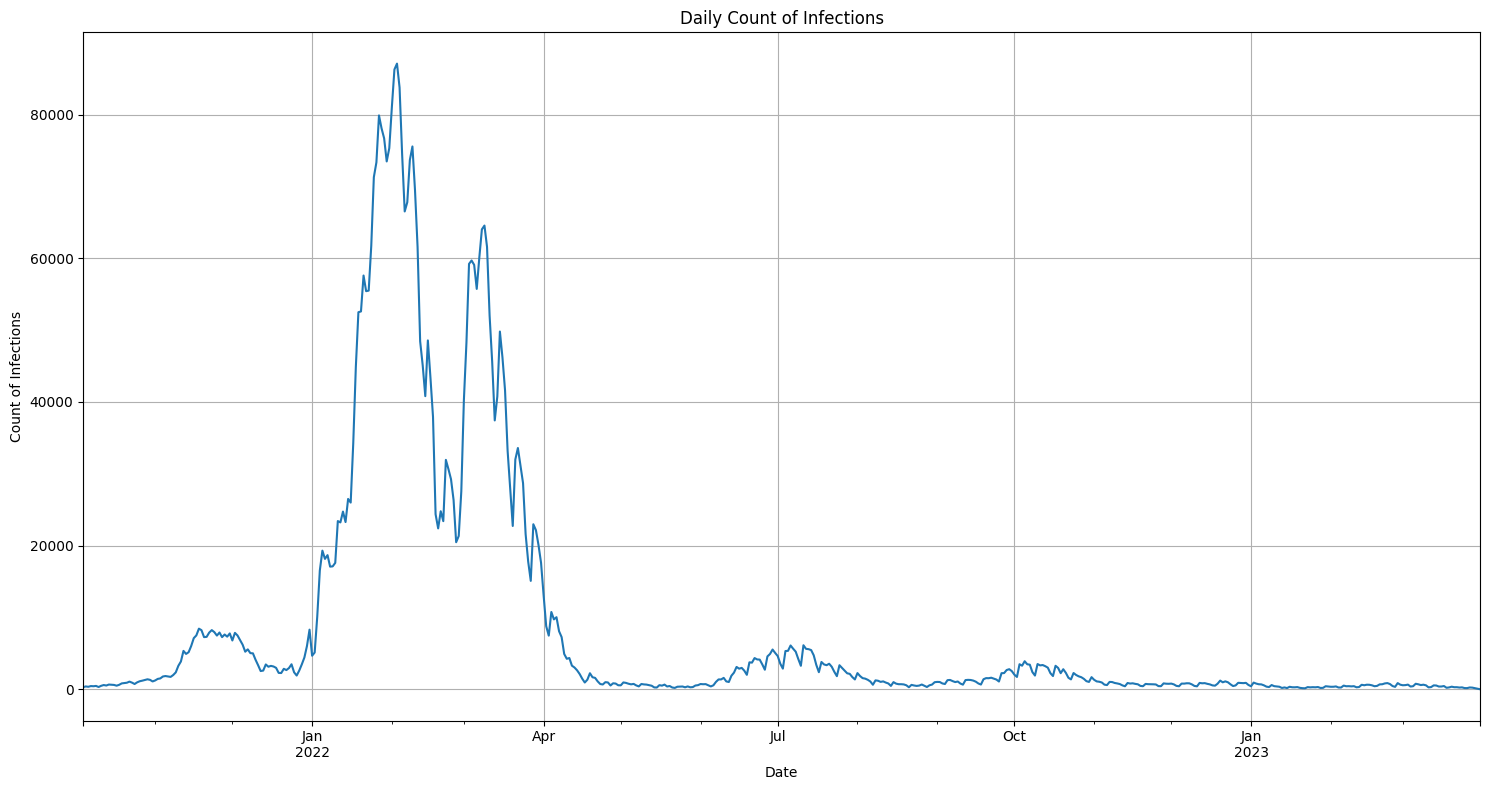

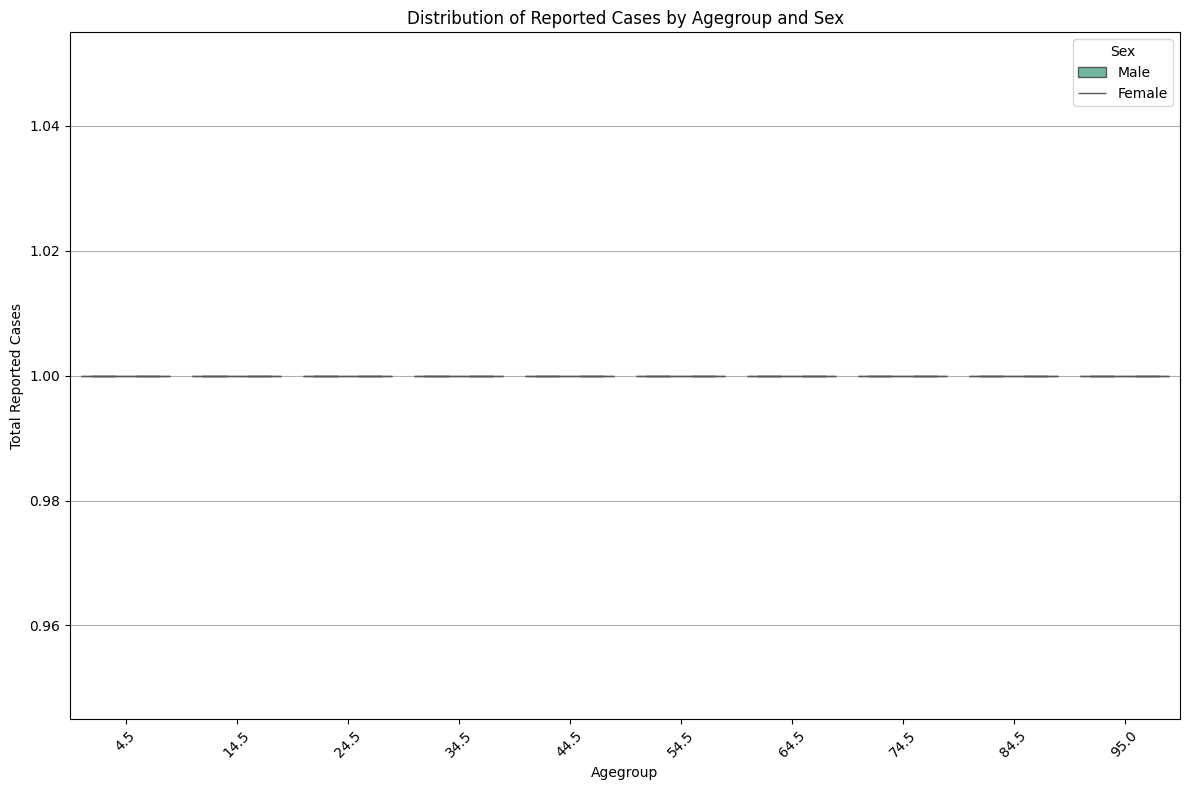

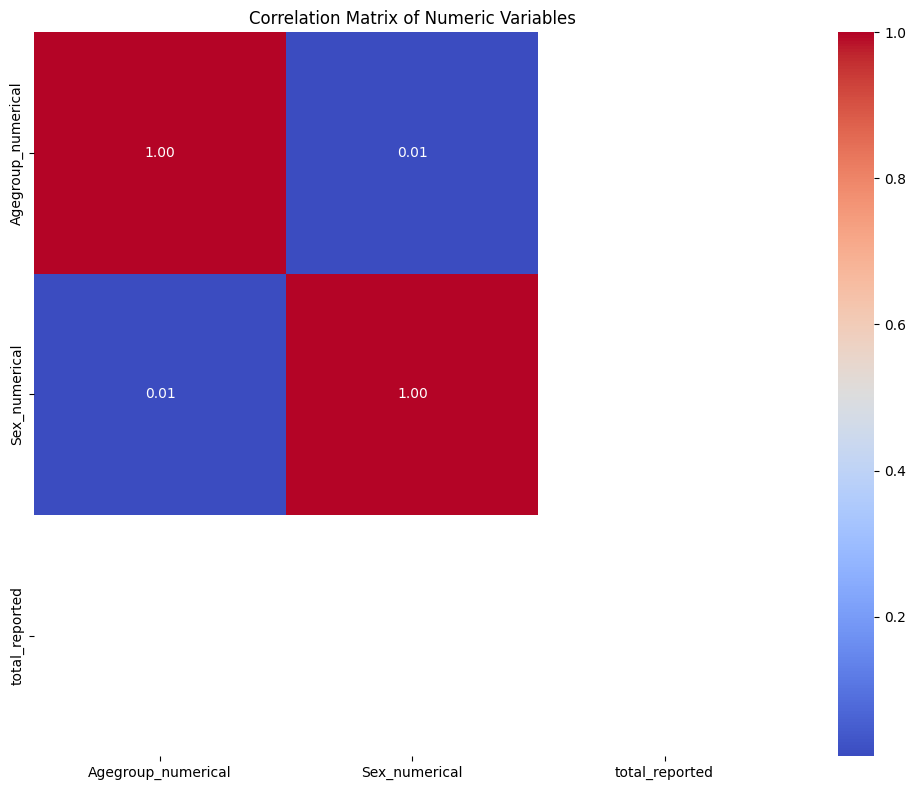

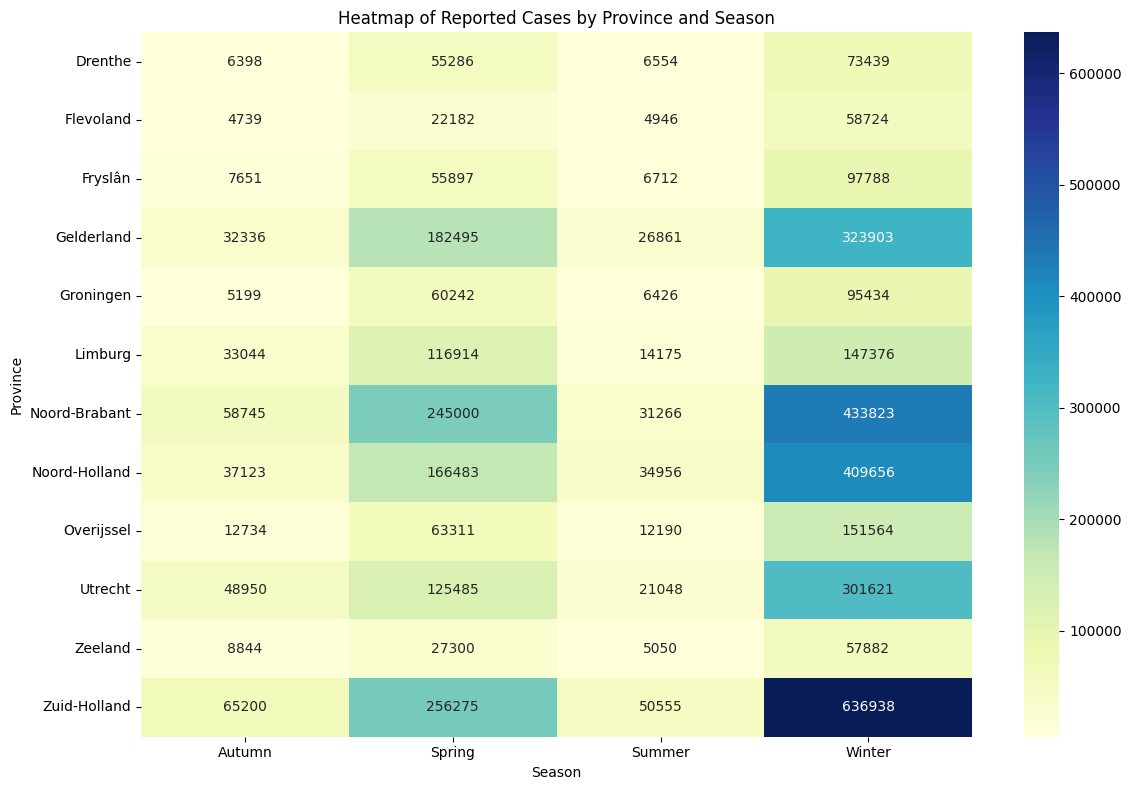

C:\Users\Camil\AppData\Local\Temp\ipykernel_11132\603567268.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Deceased', data=infections_df, palette='Set3')


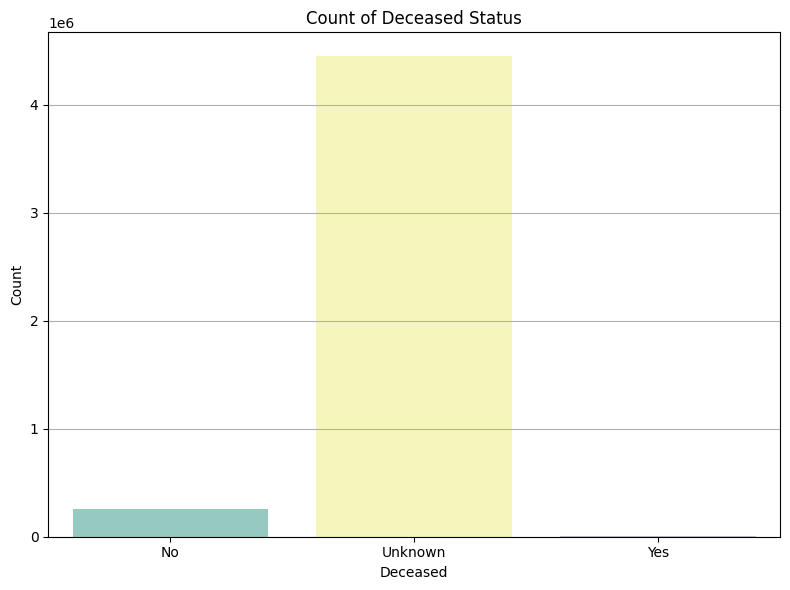

C:\Users\Camil\AppData\Local\Temp\ipykernel_11132\603567268.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Province', data=infections_df, order=infections_df['Province'].value_counts().index, palette='viridis')


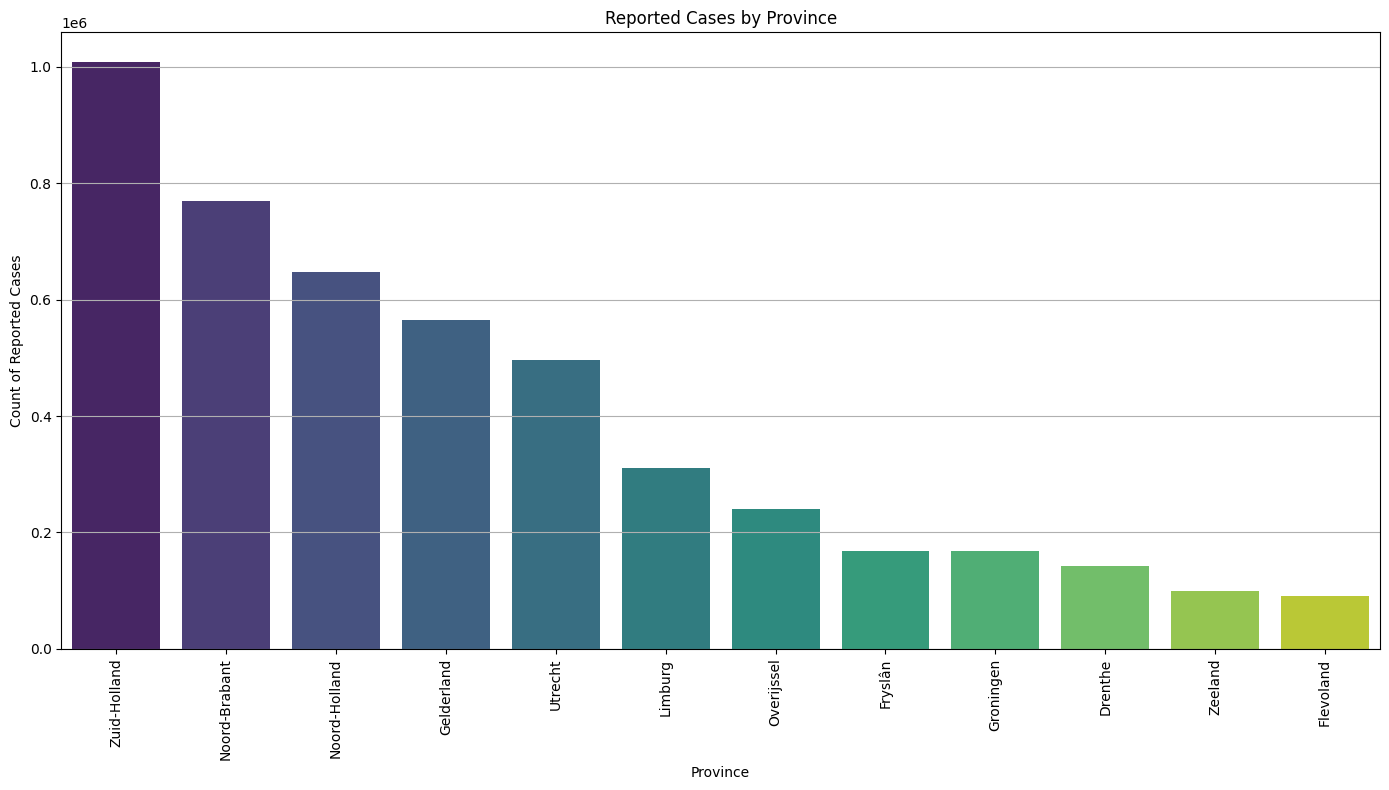

C:\Users\Camil\AppData\Local\Temp\ipykernel_11132\603567268.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agegroup', data=infections_df, order=infections_df['Agegroup'].value_counts().index, palette='mako')


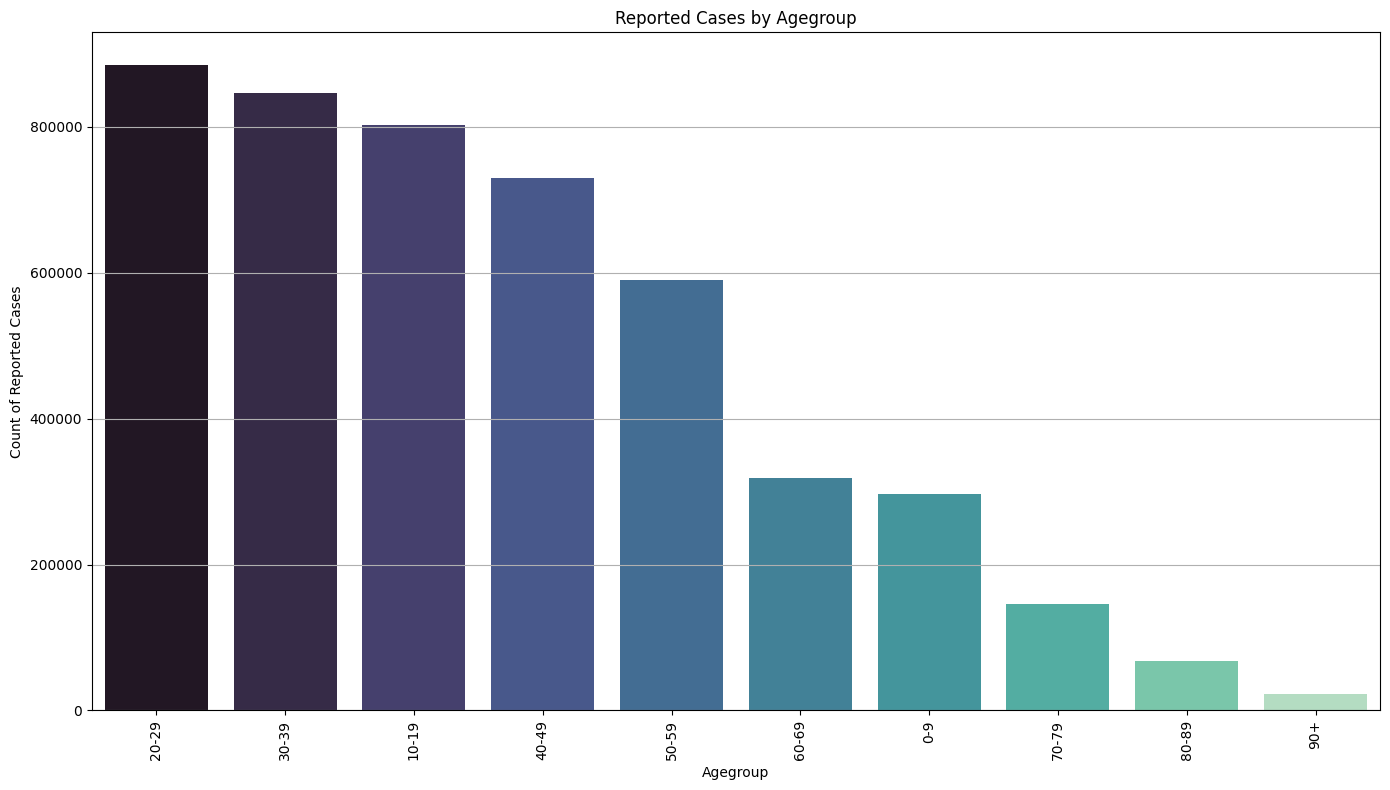

C:\Users\Camil\AppData\Local\Temp\ipykernel_11132\603567268.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=infections_df, order=infections_df['Season'].value_counts().index, palette='rocket')


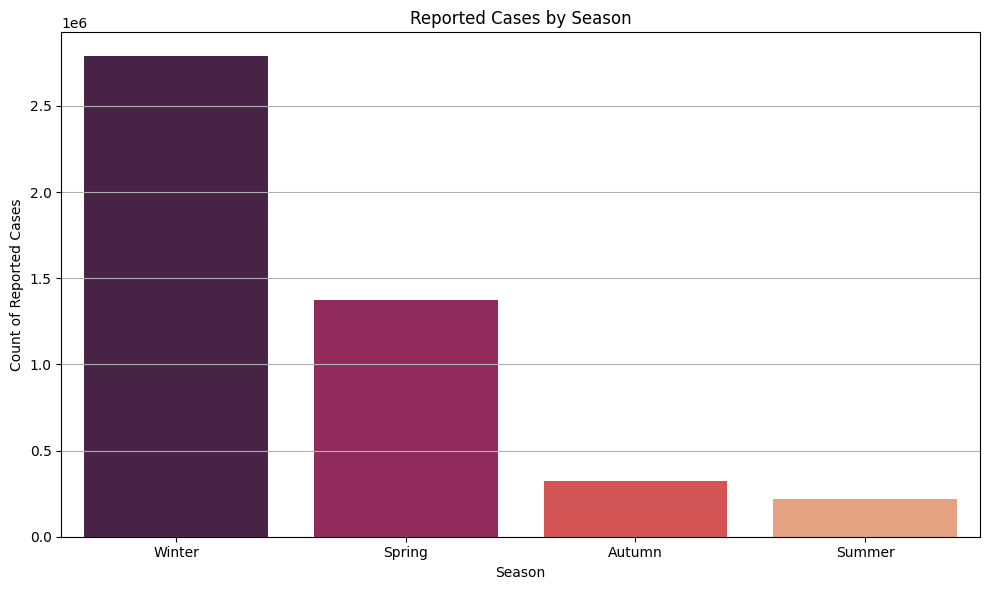

In [956]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming infections_df is already defined and loaded with the updated columns

# Check the dataframe
print(infections_df.head())

# Plot showing the daily count of infections over time
plt.figure(figsize=(15, 8))
infections_df['Amount_of_infections_df'] = 1
infections_df['Amount_of_infections_df'].resample('D').sum().plot()
plt.title('Daily Count of Infections')
plt.xlabel('Date')
plt.ylabel('Count of Infections')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensure Agegroup_numerical and Sex_numerical are numeric
infections_df['Agegroup_numerical'] = pd.to_numeric(infections_df['Agegroup_numerical'], errors='coerce')
infections_df['Sex_numerical'] = pd.to_numeric(infections_df['Sex_numerical'], errors='coerce')
infections_df['total_reported'] = pd.to_numeric(infections_df['total_reported'], errors='coerce')

# Boxplot for Agegroup distribution by Sex
plt.figure(figsize=(12, 8))
sns.boxplot(x='Agegroup_numerical', y='total_reported', hue='Sex_numerical', data=infections_df, palette='Set2')
plt.title('Distribution of Reported Cases by Agegroup and Sex')
plt.xlabel('Agegroup')
plt.ylabel('Total Reported Cases')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Heatmap for correlation between numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(infections_df[['Agegroup_numerical', 'Sex_numerical', 'total_reported']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Heatmap for Province and Season distribution
province_season_pivot = infections_df.pivot_table(index='Province', columns='Season', values='total_reported', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(province_season_pivot, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Heatmap of Reported Cases by Province and Season')
plt.xlabel('Season')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

# Count plot for Deceased status
plt.figure(figsize=(8, 6))
sns.countplot(x='Deceased', data=infections_df, palette='Set3')
plt.title('Count of Deceased Status')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Count plot for infections per Province
plt.figure(figsize=(14, 8))
sns.countplot(x='Province', data=infections_df, order=infections_df['Province'].value_counts().index, palette='viridis')
plt.title('Reported Cases by Province')
plt.xlabel('Province')
plt.ylabel('Count of Reported Cases')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Count plot for infections per Agegroup
plt.figure(figsize=(14, 8))
sns.countplot(x='Agegroup', data=infections_df, order=infections_df['Agegroup'].value_counts().index, palette='mako')
plt.title('Reported Cases by Agegroup')
plt.xlabel('Agegroup')
plt.ylabel('Count of Reported Cases')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Count plot for infections per Season
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=infections_df, order=infections_df['Season'].value_counts().index, palette='rocket')
plt.title('Reported Cases by Season')
plt.xlabel('Season')
plt.ylabel('Count of Reported Cases')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [958]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Coordinates of Dutch provinces
province_coords = {
    "Drenthe": (52.9474, 6.6238),
    "Flevoland": (52.527978, 5.595350),
    "Fryslân": (53.1642, 5.7818),
    "Gelderland": (52.0459, 5.8716),
    "Groningen": (53.2194, 6.5665),
    "Limburg": (51.2194, 5.9398),
    "Noord-Brabant": (51.4827, 5.2328),
    "Noord-Holland": (52.5200, 4.7500),
    "Overijssel": (52.4451, 6.5017),
    "Utrecht": (52.0911, 5.1222),
    "Zeeland": (51.4416, 3.7678),
    "Zuid-Holland": (51.9200, 4.4800)
}

# Add Latitude and Longitude columns based on the province_coords dictionary
infections_by_province['Latitude'] = infections_by_province['Province'].map(lambda p: province_coords[p][0] if p in province_coords else None)
infections_by_province['Longitude'] = infections_by_province['Province'].map(lambda p: province_coords[p][1] if p in province_coords else None)

# Display the updated dataframe
print("\nInfections by Province with Coordinates:")
print(infections_by_province)


# Create a map centered on the Netherlands
map = folium.Map(location=[52.1326, 5.2913], zoom_start=7)

# Add a heatmap to the map
HeatMap(data=infections_by_province[['Latitude', 'Longitude', 'Infections']], radius=60).add_to(map)

# Save and display the map
map.save('infections_heatmap.html')
map



Infections by Province with Coordinates:
         Province  Infections   Latitude  Longitude
0         Drenthe      141677  52.947400    6.62380
1       Flevoland       90591  52.527978    5.59535
2         Fryslân      168048  53.164200    5.78180
3      Gelderland      565595  52.045900    5.87160
4       Groningen      167301  53.219400    6.56650
5         Limburg      311509  51.219400    5.93980
6   Noord-Brabant      768834  51.482700    5.23280
7   Noord-Holland      648218  52.520000    4.75000
8      Overijssel      239799  52.445100    6.50170
9         Utrecht      497104  52.091100    5.12220
10        Zeeland       99076  51.441600    3.76780
11   Zuid-Holland     1008968  51.920000    4.48000
